## notebook to pull Alpha Vantage share prices from API
## and plot in Bokeh
https://medium.com/alpha-vantage/get-started-with-alpha-vantage-data-619a70c7f33a
https://github.com/RomelTorres/alpha_vantage

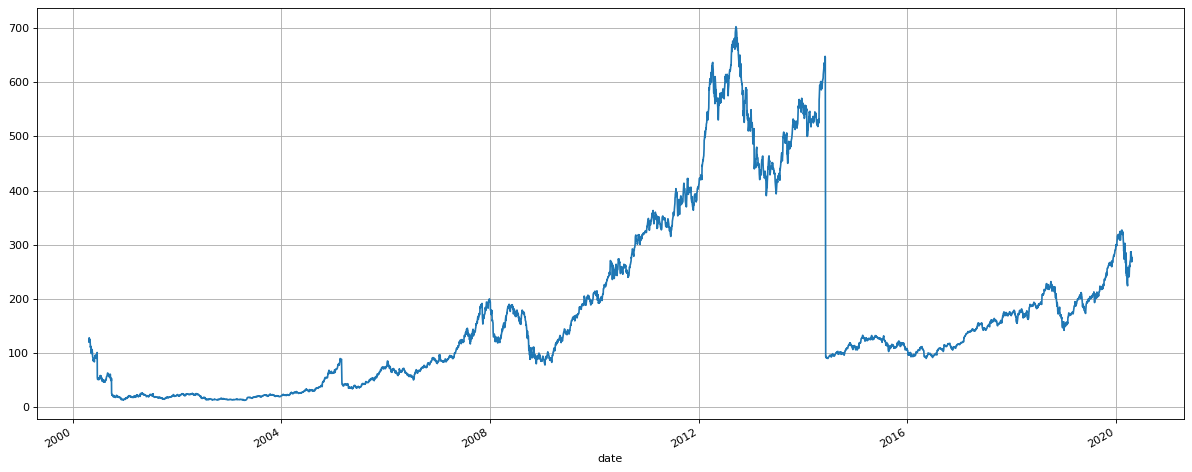

In [91]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

# Your key here
key = 'A0YD8RR1JNNH5Z1G'
# Chose your output format, or default to JSON (python dict)
ts = TimeSeries(key, output_format='pandas', indexing_type='date')
ti = TechIndicators(key, output_format='pandas', indexing_type='date')

# Get the data, returns a tuple
# aapl_data is a pandas dataframe, aapl_meta_data is a dict
aapl_data, aapl_meta_data = ts.get_daily(symbol='AAPL', outputsize='full')
# aapl_sma is a dict, aapl_meta_sma also a dict
aapl_sma, aapl_meta_sma = ti.get_sma(symbol='AAPL')


# Visualization
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
aapl_data['4. close'].plot()
plt.tight_layout()
plt.grid()
plt.show()

In [86]:
aapl_sma_50, aapl_meta_sma_50 = ti.get_sma(symbol='AAPL', time_period=50)
aapl_sma_50['SMA_50']=aapl_sma_50['SMA']
aapl_sma_50

,SMA,SMA_50
date,,
2000-07-03,92.5520,92.5520
2000-07-05,91.1746,91.1746
2000-07-06,89.6446,89.6446
2000-07-07,88.3072,88.3072
2000-07-10,86.9148,86.9148
...,...,...
2020-04-16,279.5006,279.5006
2020-04-17,278.7276,278.7276
2020-04-20,277.7620,277.7620


In [85]:
aapl_sma_200, aapl_meta_sma_200 = ti.get_sma(symbol='AAPL', time_period=200)
aapl_sma_200['SMA_200']=aapl_sma_200['SMA']
aapl_sma_200

,SMA,SMA_200
date,,
2001-02-06,47.8869,47.8869
2001-02-07,47.3881,47.3881
2001-02-08,46.8503,46.8503
2001-02-09,46.3394,46.3394
2001-02-12,45.8041,45.8041
...,...,...
2020-04-16,254.0200,254.0200
2020-04-17,254.4203,254.4203
2020-04-20,254.7829,254.7829


In [29]:
aapl_data['date'] = aapl_data.index
aapl_data.index.name = None
aapl_data

,1. open,2. high,3. low,4. close,5. volume,date
2020-04-22,273.61,277.9000,272.2000,276.10,28608084.0,2020-04-22
2020-04-21,276.28,277.2500,265.4300,268.37,45247893.0,2020-04-21
2020-04-20,277.95,281.6800,276.8500,276.93,32503750.0,2020-04-20
2020-04-17,284.69,286.9450,276.8600,282.80,53812478.0,2020-04-17
2020-04-16,287.38,288.1975,282.3502,286.69,39281290.0,2020-04-16
...,...,...,...,...,...,...
2019-12-04,261.07,263.3100,260.6800,261.74,16810388.0,2019-12-04
2019-12-03,258.31,259.5300,256.2900,259.45,29377268.0,2019-12-03
2019-12-02,267.27,268.2500,263.4500,264.16,23693550.0,2019-12-02
2019-11-29,266.60,268.0000,265.9000,267.25,11654363.0,2019-11-29


## Bokeh plot
- http://docs.bokeh.org/en/1.0.2/docs/user_guide/examples/tools_hover_tooltip_formatting.html
- https://docs.bokeh.org/en/latest/docs/user_guide/tools.html#formatting-tooltip-fields

In [31]:
import numpy as np

from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure

def datetime(x):
    return np.array(x, dtype=np.datetime64)

source = ColumnDataSource(data={
    'date'      : datetime(aapl_data['date']),
    'adj close' : aapl_data['4. close'],
    'volume'    : aapl_data['5. volume'],
})

output_notebook()

p = figure(plot_height=250, x_axis_type="datetime", tools="", toolbar_location=None,
           title="Share price", sizing_mode="scale_width")
p.background_fill_color="#f5f5f5"
p.grid.grid_line_color="white"
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
p.axis.axis_line_color = None

p.line(x='date', y='adj close', line_width=2, color='#ebbd5b', source=source)

p.add_tools(HoverTool(
    tooltips=[
        ( 'date',   '@date{%F}'            ),
        ( 'close',  '$@{adj close}{0.2f}' ), # use @{ } for field names with spaces
        ( 'volume', '@volume{0.00 a}'      ),
    ],

    formatters={
        '@date'        : 'datetime', # use 'datetime' formatter for 'date' field
        'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                  # use default 'numeral' formatter for other fields
    },

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))

show(p)

Loading BokehJS ...

https://medium.com/@andrewm4894/bokeh-battles-part-1-multi-line-plots-311109992fdc
https://colab.research.google.com/drive/1N6_NLA5CrYSRSZcudazeIOCtbjf_WSUz

In [32]:
import pandas as pd
import numpy as np
from bokeh.models import ColumnDataSource, HoverTool, Legend
from bokeh.plotting import figure, show
from bokeh.palettes import Category10
import itertools
import random 
import string
from bokeh.io import output_notebook

output_notebook()

def color_gen():
    yield from itertools.cycle(Category10[10])
color = color_gen()

Loading BokehJS ...

In [10]:
def make_data(start_date='2019-01-01',n_data=30,n_num_var=5,n_cat_var=5,n_cat_var_cardinality_upper=10):
    ''' Function to make some data and put it in a df
    '''
    dates = pd.date_range(start_date,periods=n_data)
    df = pd.DataFrame()
    df['date'] = dates
    df = df.set_index(dates)
    for n in range(n_num_var):
        df[f'num_var_{n}'] = np.random.randn(n_data)
    for n in range(n_cat_var):
        cat_vars_generated = np.unique([''.join(random.choices(string.ascii_uppercase + string.digits, k=np.random.randint(2,8))) for i in range(10000)])
        cat_vars_possible = np.random.choice(cat_vars_generated,np.random.randint(1,n_cat_var_cardinality_upper))
        df[f'cat_var_{n}'] = np.random.choice(cat_vars_possible,n_data)
    return df

In [11]:
df = make_data()
print(df.shape)
df.head()

(30, 11)


,date,num_var_0,num_var_1,num_var_2,num_var_3,num_var_4,cat_var_0,cat_var_1,cat_var_2,cat_var_3,cat_var_4
2019-01-01,2019-01-01,0.215056,-0.991101,-0.128401,0.394807,-0.526135,JORBLA,AIQ0R,N33,N828CF,UG1Z
2019-01-02,2019-01-02,0.327236,0.063877,-0.223953,2.030196,0.858587,441YCJ,5CFDTA,VTWN,QI67,252
2019-01-03,2019-01-03,-0.876417,-0.271049,2.284407,-0.377919,-1.125568,2YV,TREGNS,VTWN,N828CF,EOW4
2019-01-04,2019-01-04,-0.444083,-1.737263,-0.546502,-0.278539,-2.249978,DHY,AYP5,N33,QI67,TO5VUP
2019-01-05,2019-01-05,-1.839945,1.261367,1.624501,0.923972,-0.098624,2YV,A6JI,WMYD,QI67,EOW4


In [33]:
def plot_lines_multi(df,lw=2,pw=700,ph=400,t_str="hover,save,pan,box_zoom,reset,wheel_zoom",t_loc='above'):
    '''...
    '''
    source = ColumnDataSource(df)
    col_names = source.column_names
    p = figure(x_axis_type="datetime",plot_width=pw, plot_height=ph,toolbar_location=t_loc, tools=t_str)
    p_dict = dict()
    for col, c, col_name in zip(df.columns,color,col_names):
        p_dict[col_name] = p.line('index', col, source=source, color=c,line_width=lw)
        p.add_tools(HoverTool(
            renderers=[p_dict[col_name]],
            tooltips=[('datetime','@index{%Y-%m-%d %H:%M:%S}'),(col, f'@{col}')],
            formatters={'index': 'datetime'}
        ))
    legend = Legend(items=[(x, [p_dict[x]]) for x in p_dict])
    p.add_layout(legend,'right')
    show(p)

In [51]:
output_notebook()
#plot_lines_multi(df._get_numeric_data())
plot_lines_multi(aapl_data.iloc[:,0:4])

Loading BokehJS ...

## hvplot
https://hvplot.holoviz.org/user_guide/Customization.html

In [92]:
aapl_data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-04-22,273.61,277.9000,272.2000,276.10,28608084.0
2020-04-21,276.28,277.2500,265.4300,268.37,45247893.0
2020-04-20,277.95,281.6800,276.8500,276.93,32503750.0
2020-04-17,284.69,286.9450,276.8600,282.80,53812478.0
2020-04-16,287.38,288.1975,282.3502,286.69,39281290.0
...,...,...,...,...,...
2000-04-28,127.12,127.5000,121.3100,124.06,2228400.0
2000-04-27,117.19,127.0000,116.5800,126.75,2916100.0
2000-04-26,126.62,128.0000,120.0000,121.31,3276000.0


In [93]:
aapl_sma

,SMA
date,
2000-05-19,111.5045
2000-05-22,109.9765
2000-05-23,107.8515
2000-05-24,106.1705
2000-05-25,104.1965
...,...
2020-04-16,256.0350
2020-04-17,257.9360
2020-04-20,260.3205


In [94]:
aapl = aapl_data.merge(aapl_sma_50, left_on='date', right_on='date')
aapl = aapl.merge(aapl_sma_200, left_on='date', right_on='date')

In [95]:
aapl

,1. open,2. high,3. low,4. close,5. volume,SMA_x,SMA_50,SMA_y,SMA_200
date,,,,,,,,,
2020-04-22,273.61,277.9000,272.2000,276.10,28608084.0,275.8198,275.8198,255.4840,255.4840
2020-04-21,276.28,277.2500,265.4300,268.37,45247893.0,276.7288,276.7288,255.1036,255.1036
2020-04-20,277.95,281.6800,276.8500,276.93,32503750.0,277.7620,277.7620,254.7829,254.7829
2020-04-17,284.69,286.9450,276.8600,282.80,53812478.0,278.7276,278.7276,254.4203,254.4203
2020-04-16,287.38,288.1975,282.3502,286.69,39281290.0,279.5006,279.5006,254.0200,254.0200
...,...,...,...,...,...,...,...,...,...
2001-02-12,19.06,20.0000,18.8100,19.69,4895000.0,17.3270,17.3270,45.8041,45.8041
2001-02-09,20.50,20.8100,18.6900,19.12,10537200.0,17.2844,17.2844,46.3394,46.3394
2001-02-08,20.56,21.0600,20.1900,20.75,10788000.0,17.2626,17.2626,46.8503,46.8503


In [117]:
aapl_buy = 260
import holoviews as hv
output_notebook()
p1= aapl.hvplot.line(x = 'date', 
                        y = ['4. close', 'SMA_50', 'SMA_200'], 
                        hover_cols = ['5. volume'], 
                        legend=False, 
                        grid=True,
                        height = 400).opts(toolbar='above') 
hvplot.show(p1 * hv.HLine(aapl_buy))

Loading BokehJS ...

In [113]:
hv.help(hv.HLine)

HLine

Online example: http://holoviews.org/reference/elements/bokeh/HLine.html

-------------
Style Options
-------------

	alpha, color, hover_alpha, hover_color, hover_line_alpha, hover_line_color, level, line_alpha, line_cap, line_color, line_dash, line_join, line_width, muted_alpha, muted_color, muted_line_alpha, muted_line_color, nonselection_alpha, nonselection_color, nonselection_line_alpha, nonselection_line_color, selection_alpha, selection_color, selection_line_alpha, selection_line_color, visible

(Consult bokeh's documentation for more information.)

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'LineAnnotationPlot'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                                 Value                         Type         Bounds     Mode  

active_tools              